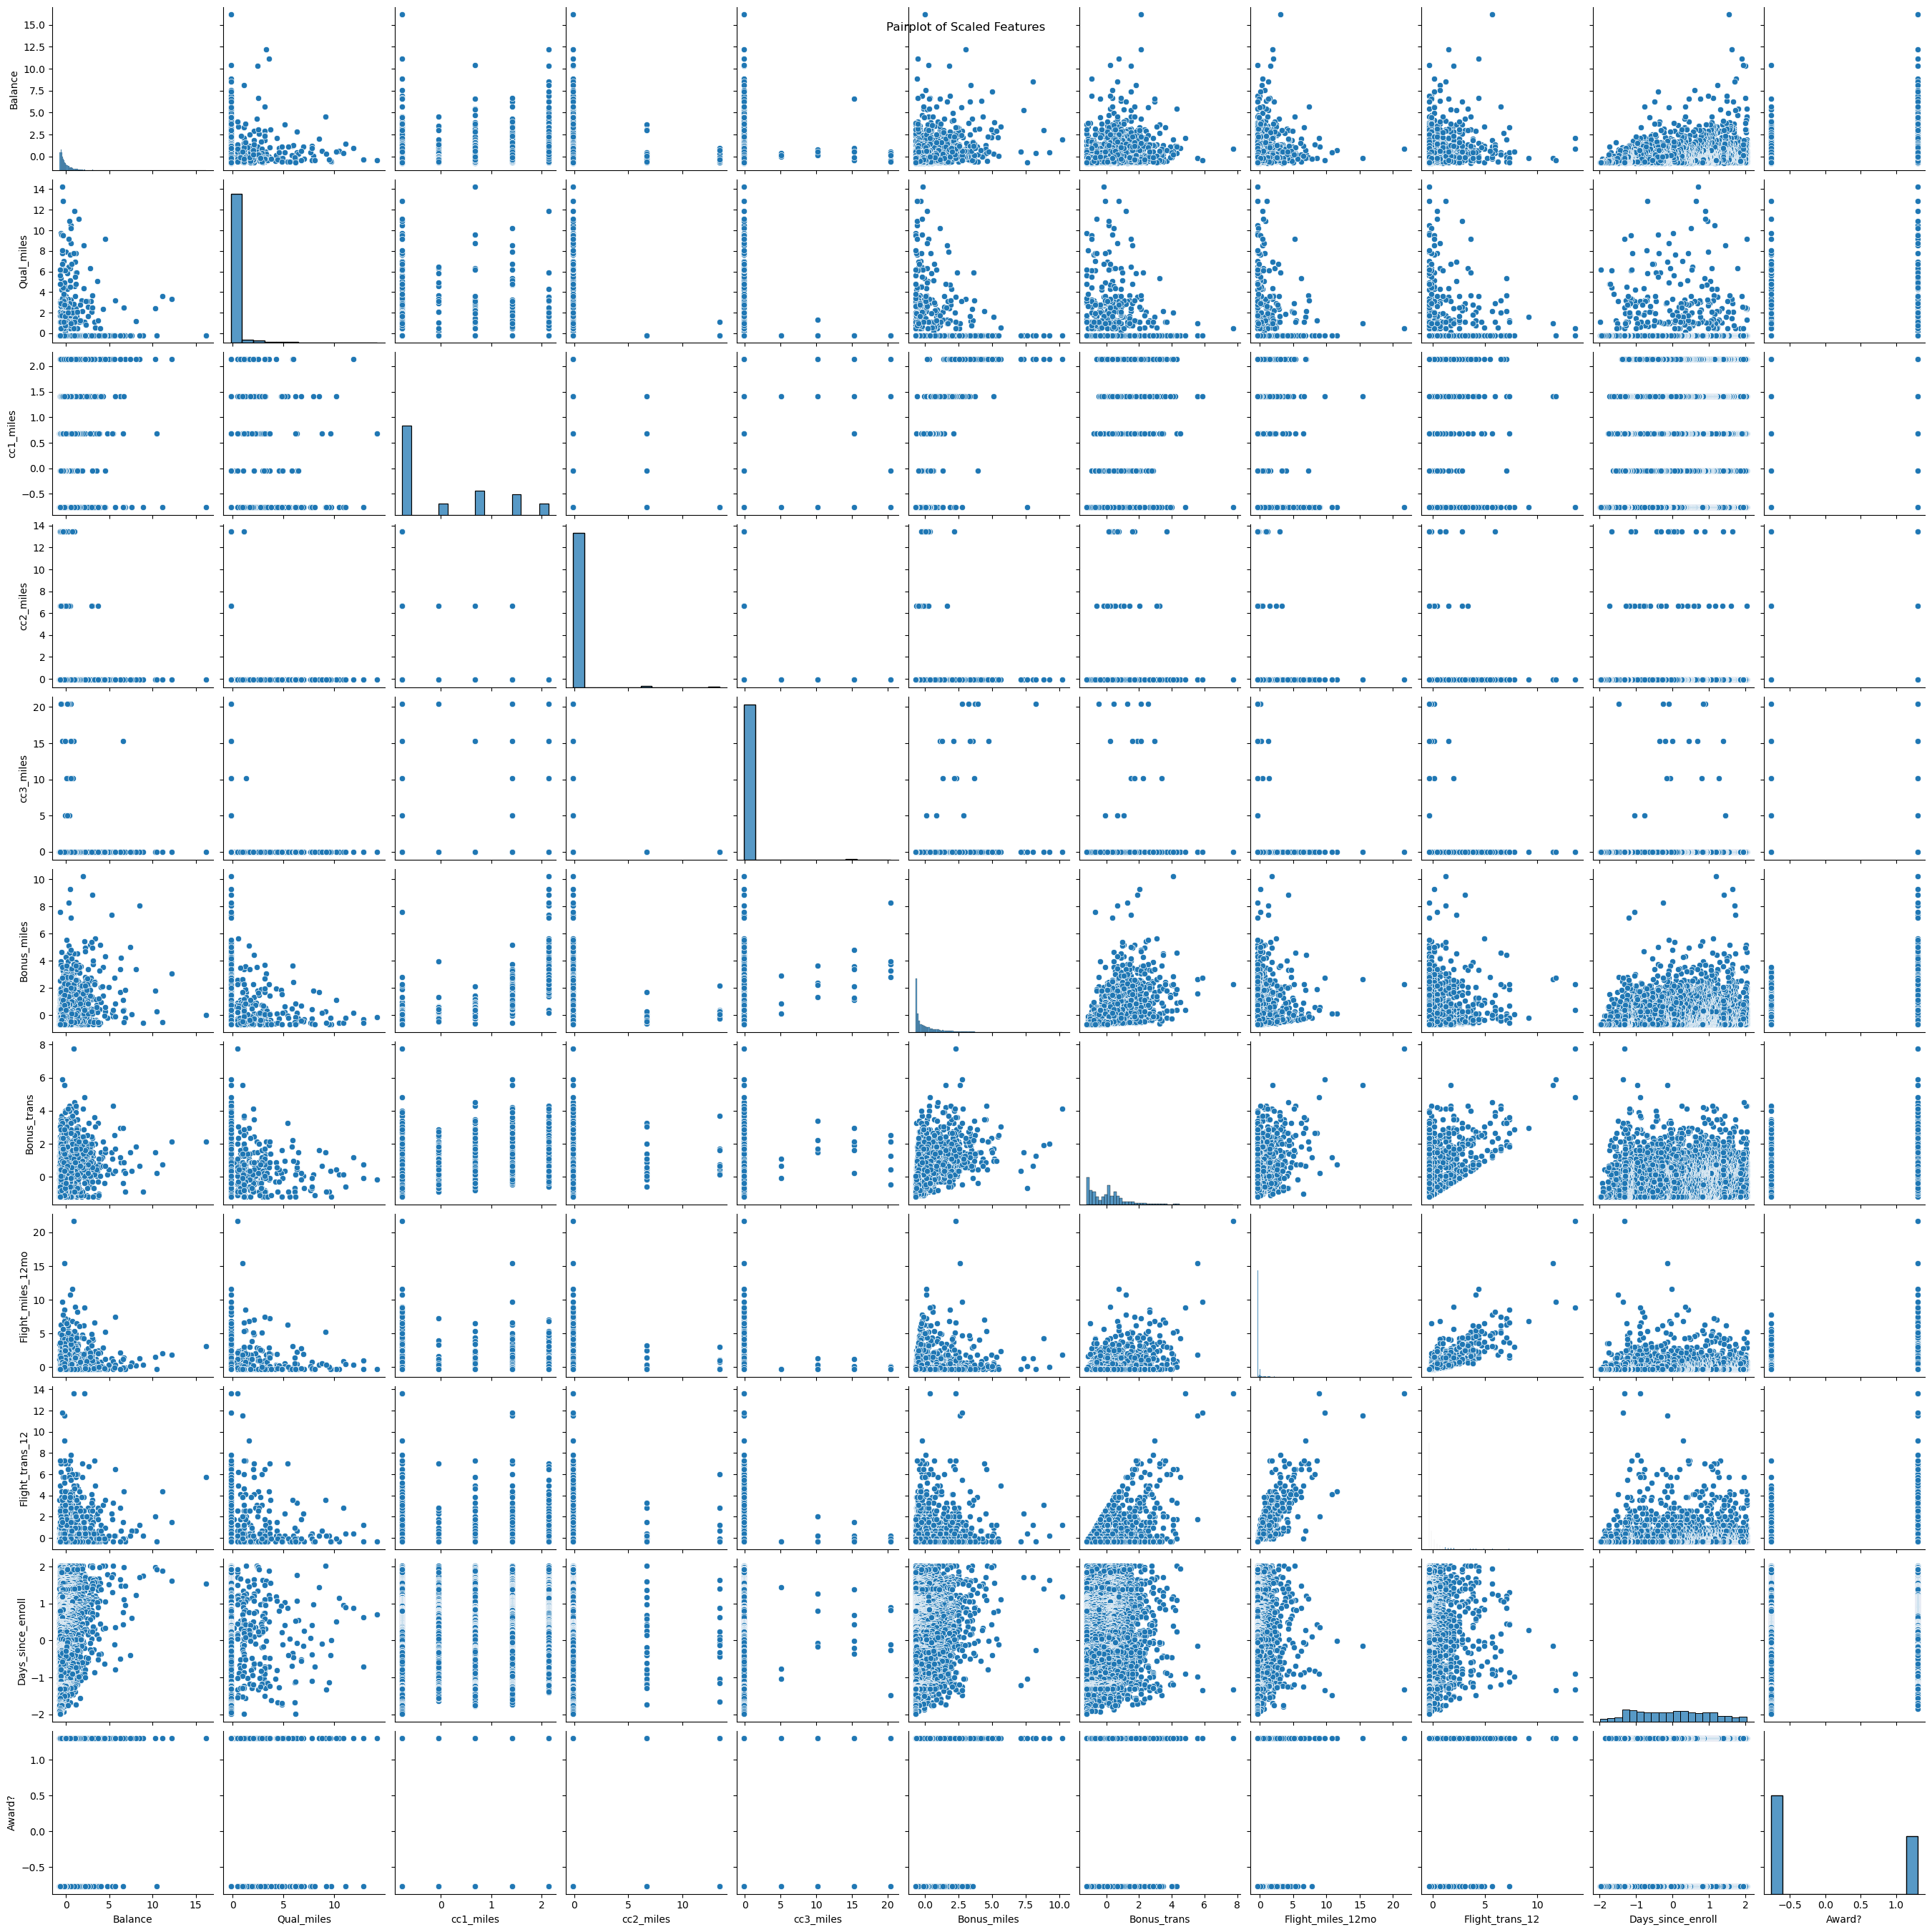

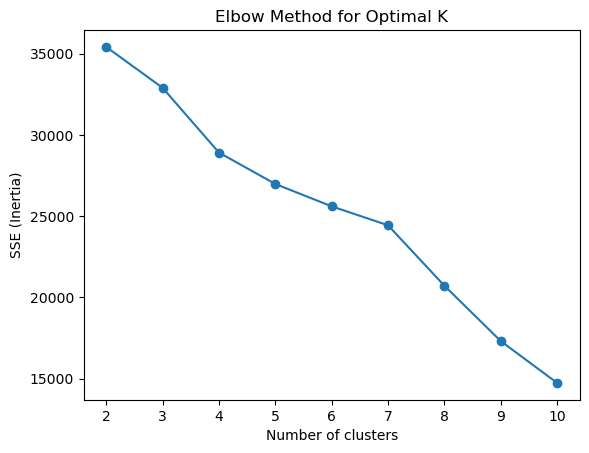

KMeans Silhouette Score: 0.19071186813310886


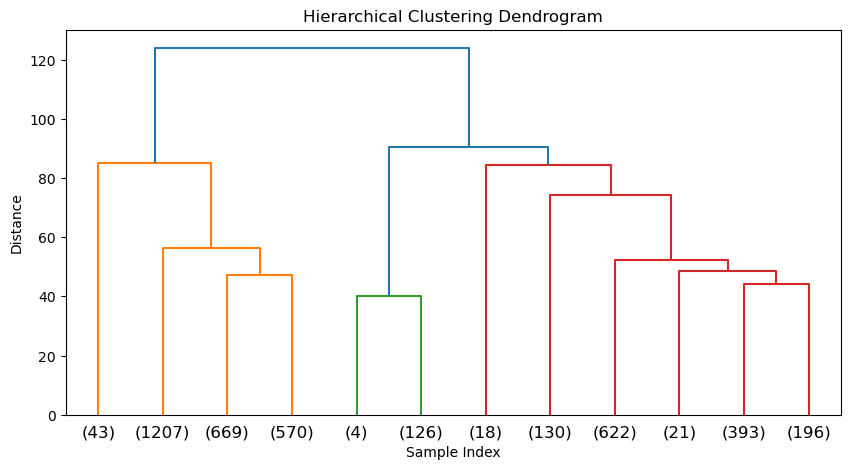

Hierarchical Clustering Silhouette Score: 0.30814152852022786
DBSCAN Silhouette Score: 0.28835811436000314


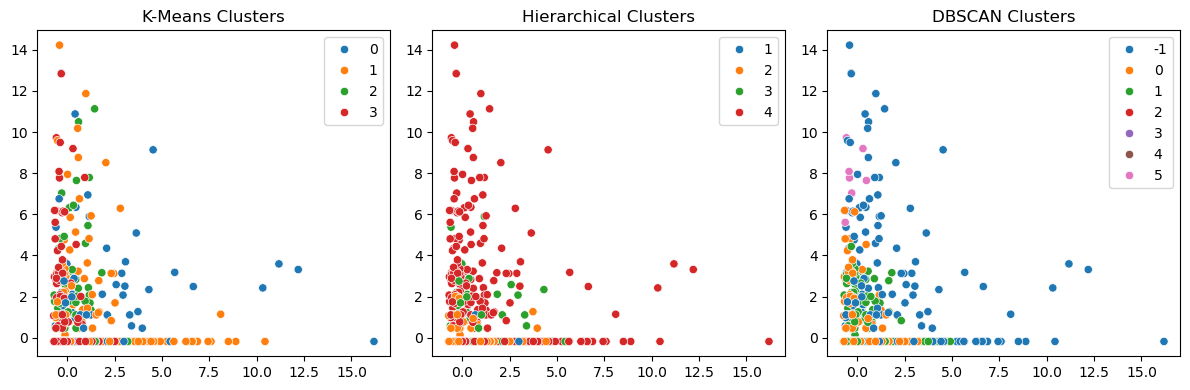

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Load Data
df_raw = pd.read_excel("EastWestAirlines.xlsx", sheet_name=1)  
df = df_raw.copy()

# Step 2: Preprocessing
df.drop('ID#', axis=1, inplace=True)  # Drop ID column if present
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: EDA 
sns.pairplot(pd.DataFrame(scaled_data, columns=df.columns))
plt.suptitle("Pairplot of Scaled Features")
plt.show()

# Step 4: K-Means Clustering
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply KMeans with optimal K (assume 4 here)
kmeans = KMeans(n_clusters=4, random_state=42)
k_labels = kmeans.fit_predict(scaled_data)
print("KMeans Silhouette Score:", silhouette_score(scaled_data, k_labels))

# Step 5: Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Apply Hierarchical clustering with 4 clusters
h_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
print("Hierarchical Clustering Silhouette Score:", silhouette_score(scaled_data, h_labels))

# Step 6: DBSCAN Clustering
dbscan = DBSCAN(eps=1.8, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data)
# Filter out noise points (-1) for silhouette score
core_mask = db_labels != -1
if len(set(db_labels[core_mask])) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_data[core_mask], db_labels[core_mask]))
else:
    print("DBSCAN could not form sufficient clusters.")

# Step 7: Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=k_labels, palette="tab10")
plt.title("K-Means Clusters")

plt.subplot(1, 3, 2)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=h_labels, palette="tab10")
plt.title("Hierarchical Clusters")

plt.subplot(1, 3, 3)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=db_labels, palette="tab10")
plt.title("DBSCAN Clusters")

plt.tight_layout()
plt.show()
